In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# check no nans in train dataset
pd.read_csv('.\\training.csv').isnull().sum()

Client                          0
Sale_MF                         0
Sale_CC                         0
Sale_CL                         0
Revenue_MF                      0
Revenue_CC                      0
Revenue_CL                      0
Sex                             0
Age                             0
Tenure                          0
Count_CA                        0
Count_SA                        0
Count_MF                        0
Count_OVD                       0
Count_CC                        0
Count_CL                        0
ActBal_CA                       0
ActBal_SA                       0
ActBal_MF                       0
ActBal_OVD                      0
ActBal_CC                       0
ActBal_CL                       0
VolumeCred                      0
VolumeCred_CA                   0
TransactionsCred                0
TransactionsCred_CA             0
VolumeDeb                       0
VolumeDeb_CA                    0
VolumeDebCash_Card              0
VolumeDebCashl

In [5]:
pd.read_csv('.\\training.csv').shape

(969, 36)

In [4]:
pd.read_csv('.\\test.csv').isnull().sum()

Client                          0
Sex                             0
Age                             0
Tenure                          0
Count_CA                        0
Count_SA                        0
Count_MF                        0
Count_OVD                       0
Count_CC                        0
Count_CL                        0
ActBal_CA                       0
ActBal_SA                       0
ActBal_MF                       0
ActBal_OVD                      0
ActBal_CC                       0
ActBal_CL                       0
VolumeCred                      0
VolumeCred_CA                   0
TransactionsCred                0
TransactionsCred_CA             0
VolumeDeb                       0
VolumeDeb_CA                    0
VolumeDebCash_Card              0
VolumeDebCashless_Card          0
VolumeDeb_PaymentOrder          0
TransactionsDeb                 0
TransactionsDeb_CA              0
TransactionsDebCash_Card        0
TransactionsDebCashless_Card    0
TransactionsDe

In [7]:
pd.read_csv('.\\test.csv').shape

(646, 30)

In [8]:
df = pd.read_csv('.\\total_data.csv')

In [ ]:
# Super basic inital check to see which variable are related to each other

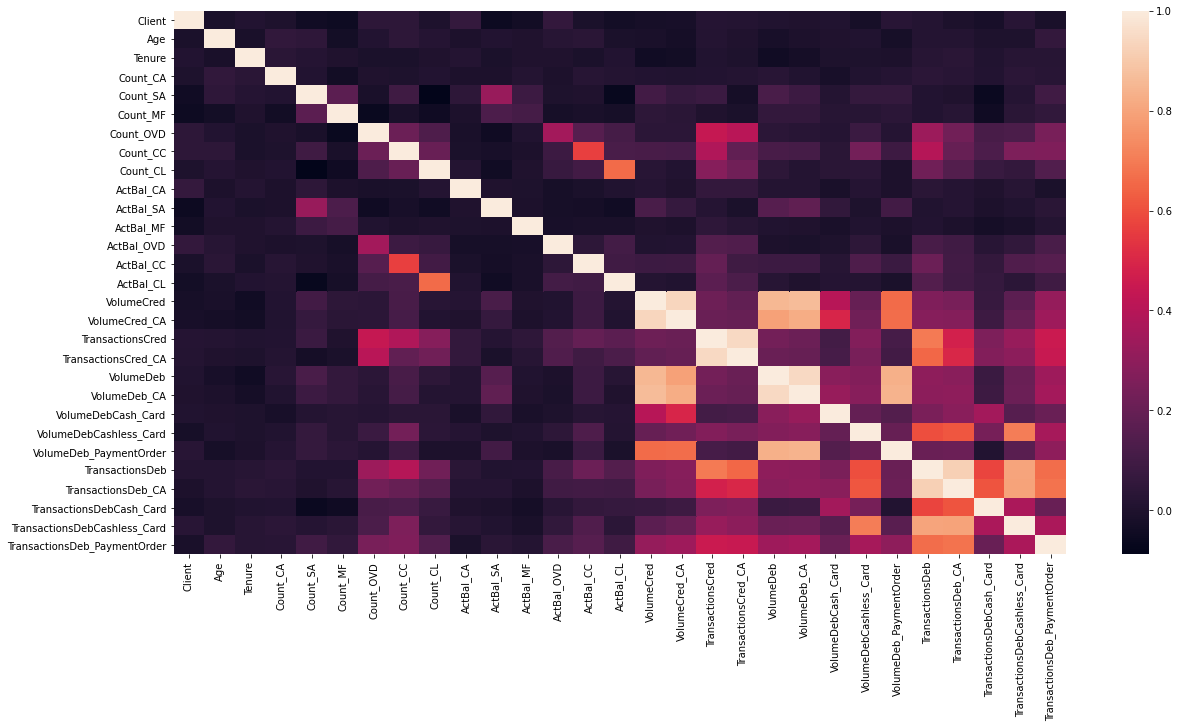

In [11]:
plt.figure(figsize=(20,10))
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [29]:
# https://stackoverflow.com/questions/17778394/ list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
# simple piece of code to generate top correlating variables 
# wrapping in def to be reused later

def generate_top_corr(corr):
    return (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

In [39]:
# Top 20 correlated values this is where EDA should probably focus on
corr =  generate_top_corr(corr)
corr[:20]

TransactionsCred        TransactionsCred_CA             0.948336
VolumeDeb               VolumeDeb_CA                    0.945099
VolumeCred              VolumeCred_CA                   0.937199
TransactionsDeb         TransactionsDeb_CA              0.919539
VolumeCred              VolumeDeb_CA                    0.867540
                        VolumeDeb                       0.853648
VolumeDeb_CA            VolumeDeb_PaymentOrder          0.838651
VolumeDeb               VolumeDeb_PaymentOrder          0.829989
VolumeCred_CA           VolumeDeb_CA                    0.822569
TransactionsDeb         TransactionsDebCashless_Card    0.802159
TransactionsDeb_CA      TransactionsDebCashless_Card    0.798057
VolumeCred_CA           VolumeDeb                       0.795619
VolumeDebCashless_Card  TransactionsDebCashless_Card    0.704626
TransactionsCred        TransactionsDeb                 0.694694
TransactionsDeb_CA      TransactionsDeb_PaymentOrder    0.678805
TransactionsDeb         T

In [31]:
train_df = pd.read_csv('.\\training.csv')
train_corr = train_df.corr()


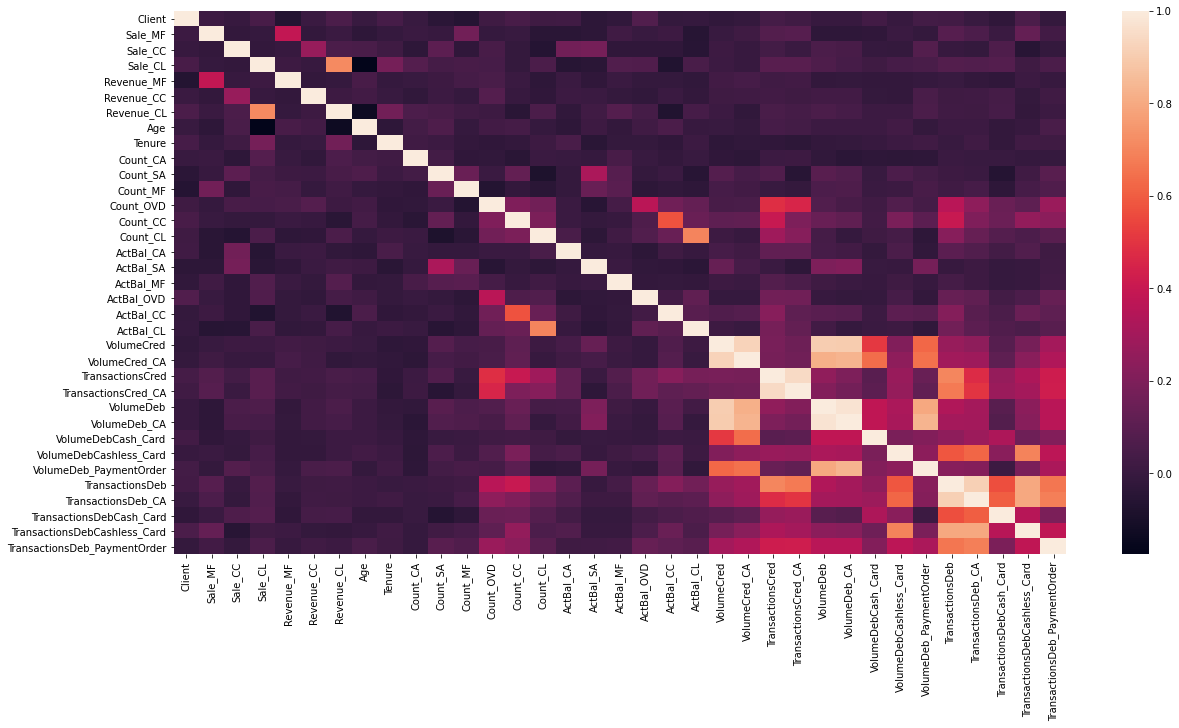

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(train_corr, 
        xticklabels=train_corr.columns,
        yticklabels=train_corr.columns)

In [ ]:
# Cool so by the looks of it there isn't obvious features to predicts on but by the looks of it there is some variables which have some relation maybe .4.

In [53]:
training_top_corr =  generate_top_corr(train_corr)

In [51]:
# I want to filter the top correlating values to the labels i'm trying to predict so I'm going to filter the correlation series to just show me values in these values
labels = train_df.columns[1:7]
labels

Index(['Sale_MF', 'Sale_CC', 'Sale_CL', 'Revenue_MF', 'Revenue_CC',
       'Revenue_CL'],
      dtype='object')

In [58]:
# top 50 values
training_top_corr.loc[labels].head(50)

Sale_CL     Revenue_CL                      0.712570
Sale_MF     Revenue_MF                      0.388389
Sale_CC     Revenue_CC                      0.265885
Sale_CL     Tenure                          0.177345
Sale_CC     ActBal_SA                       0.176878
Revenue_CL  Tenure                          0.167014
Sale_CC     ActBal_CA                       0.166340
Sale_MF     Count_MF                        0.164993
            TransactionsDebCashless_Card    0.129922
Sale_CC     Count_SA                        0.106517
Sale_CL     TransactionsCred_CA             0.092394
            TransactionsCred                0.090906
Sale_MF     TransactionsDeb                 0.090371
            TransactionsCred_CA             0.088573
Revenue_CL  ActBal_MF                       0.085097
Sale_CL     Count_CA                        0.084619
Revenue_CC  Count_OVD                       0.084483
Sale_CL     TransactionsDebCash_Card        0.082213
Sale_MF     TransactionsCred                0.

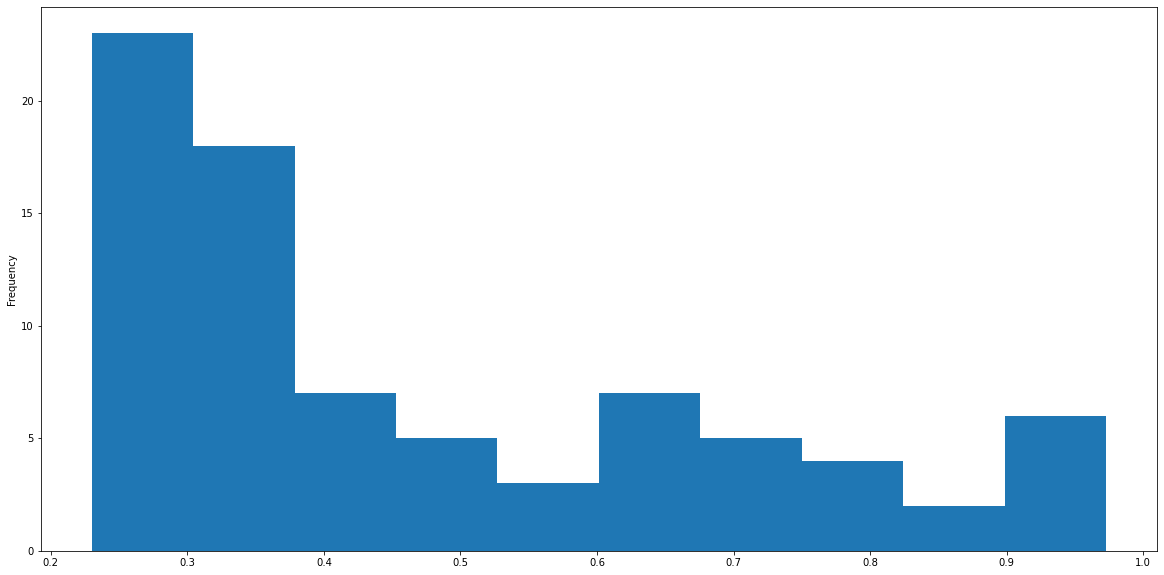

In [70]:
training_top_corr[:80].plot(kind = 'hist', figsize=(20,10))

In [ ]:
# Alright awesome this is a start. So there seems to be some reasonable correlation between some variable and the labels to I'm going to probably end the barebones EDA here and just fit a baseline model here because honestly giving the correlation values it seems like there is potenital for reasonable split in some tree based model

In [ ]:
# I will return here after I have fit some model to my train and test sets and insert my intial results

In [72]:
train_df['Revenue_CL'].mean()

3.6042201090962704